## Education Case : Prediction of how many student completed the course and it's output

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy as stats

In [2]:
# Loding dataset
data=pd.read_csv('online_course_engagement_data.csv')

In [3]:
data

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


## Domine Analysis

Let's analyze the domain analysis

##### 1. UserID
   
*    Unique identifier for each user.

##### 2. CourseCategory
   
*    Category or subject area of the course (e.g., Health, Arts, Science, Programming).

##### 3. TimeSpentOnCourse
   
*    Amount of time (presumably in hours) that the user has spent on the course.

##### 4. NumberOfVideosWatched
   
*    Number of videos the user has watched in the course.

##### 5. NumberOfQuizzesTaken
   
*    Number of quizzes the user has taken in the course.

##### 6. QuizScores
   
*    Average score of quizzes taken by the user.

##### 7. CompletionRate
   
*    Percentage of the course completed by the user.

##### 8. DeviceType
   
*    Type of device used by the user (e.g., 0 might represent desktop, 1 might represent mobile).

##### 9. CourseCompletion
   
*    Indicates whether the user has completed the course (0 for not completed, 1 for completed).

In [4]:
data.shape

(9000, 9)

In [5]:
data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [6]:
data.tail()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1
8999,5595,Health,93.589781,7,5,56.274546,11.299071,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [8]:
data.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [9]:
data.CourseCompletion.unique() # This is Target column

array([0, 1], dtype=int64)

In [10]:
data.isnull().sum() # check NuN values

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [11]:
data.columns

Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion'],
      dtype='object')

In [12]:
data.head(2)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0


<Axes: ylabel='Density'>

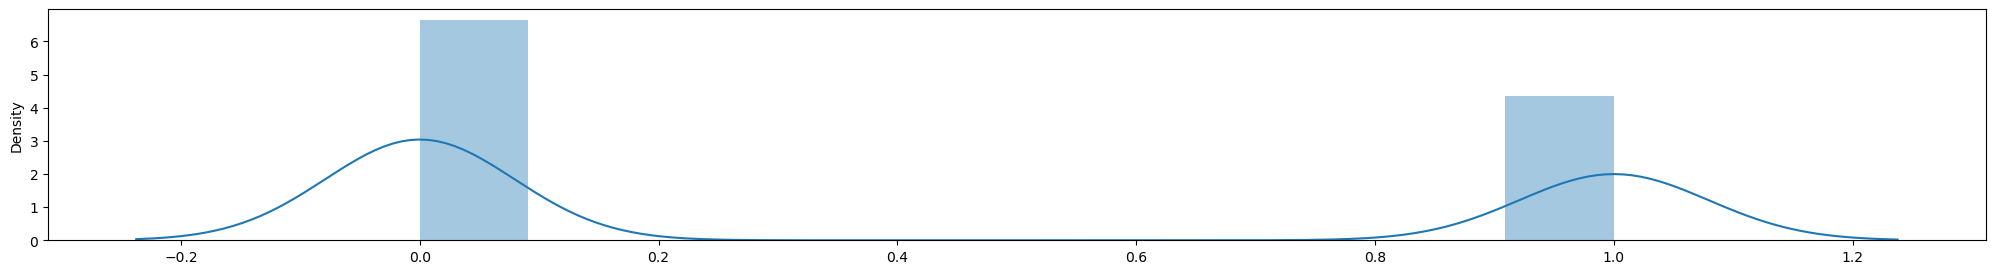

In [13]:
plt.figure(figsize=(25,3))
sns.distplot(x=data.CourseCompletion)

## Exploratory Data Analysis (EDA)

### Univariant Analysis 

In [14]:
box=data.iloc[:,:-1]
box.drop('CourseCategory',axis=1,inplace=True)

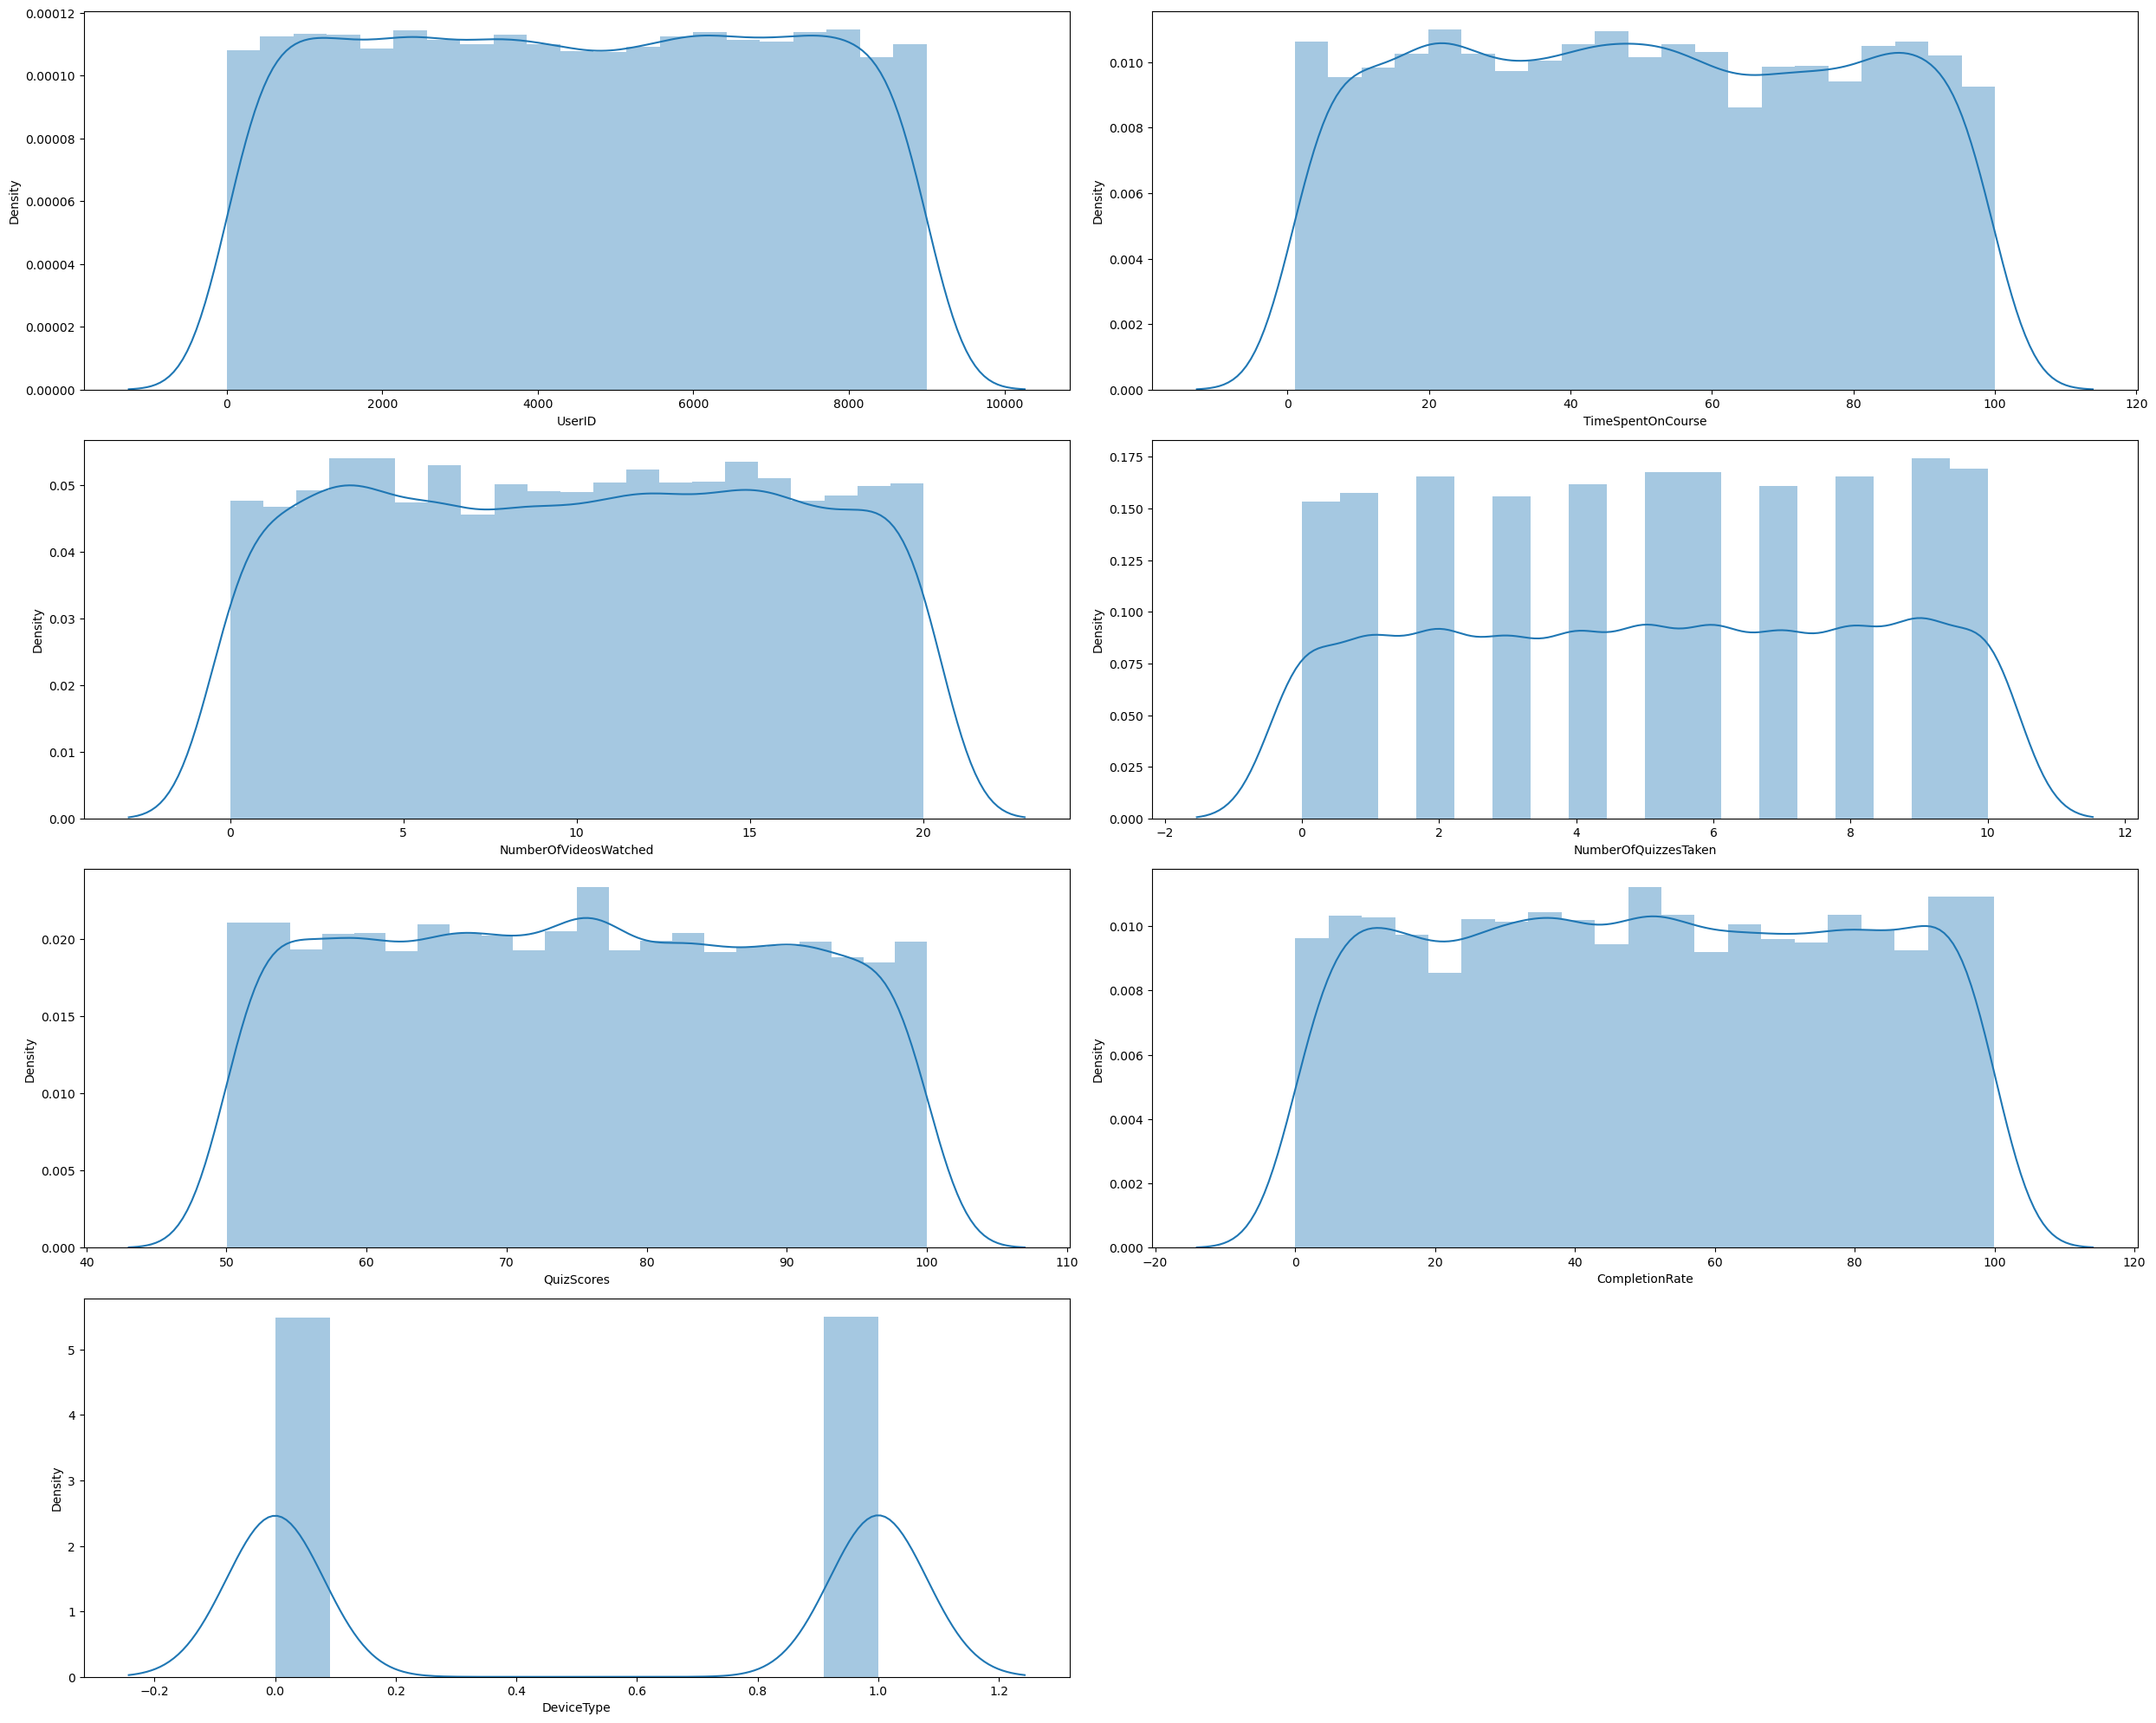

In [15]:
plt.figure(figsize=(25,20))
plotnumber=1
for columns in box:
    if plotnumber<=7:
        plt.subplot(4,2,plotnumber)
        sns.distplot(box[columns])
    plotnumber+=1
plt.tight_layout()

## Bivariant analysis

### Analysis of continous variable with target variable

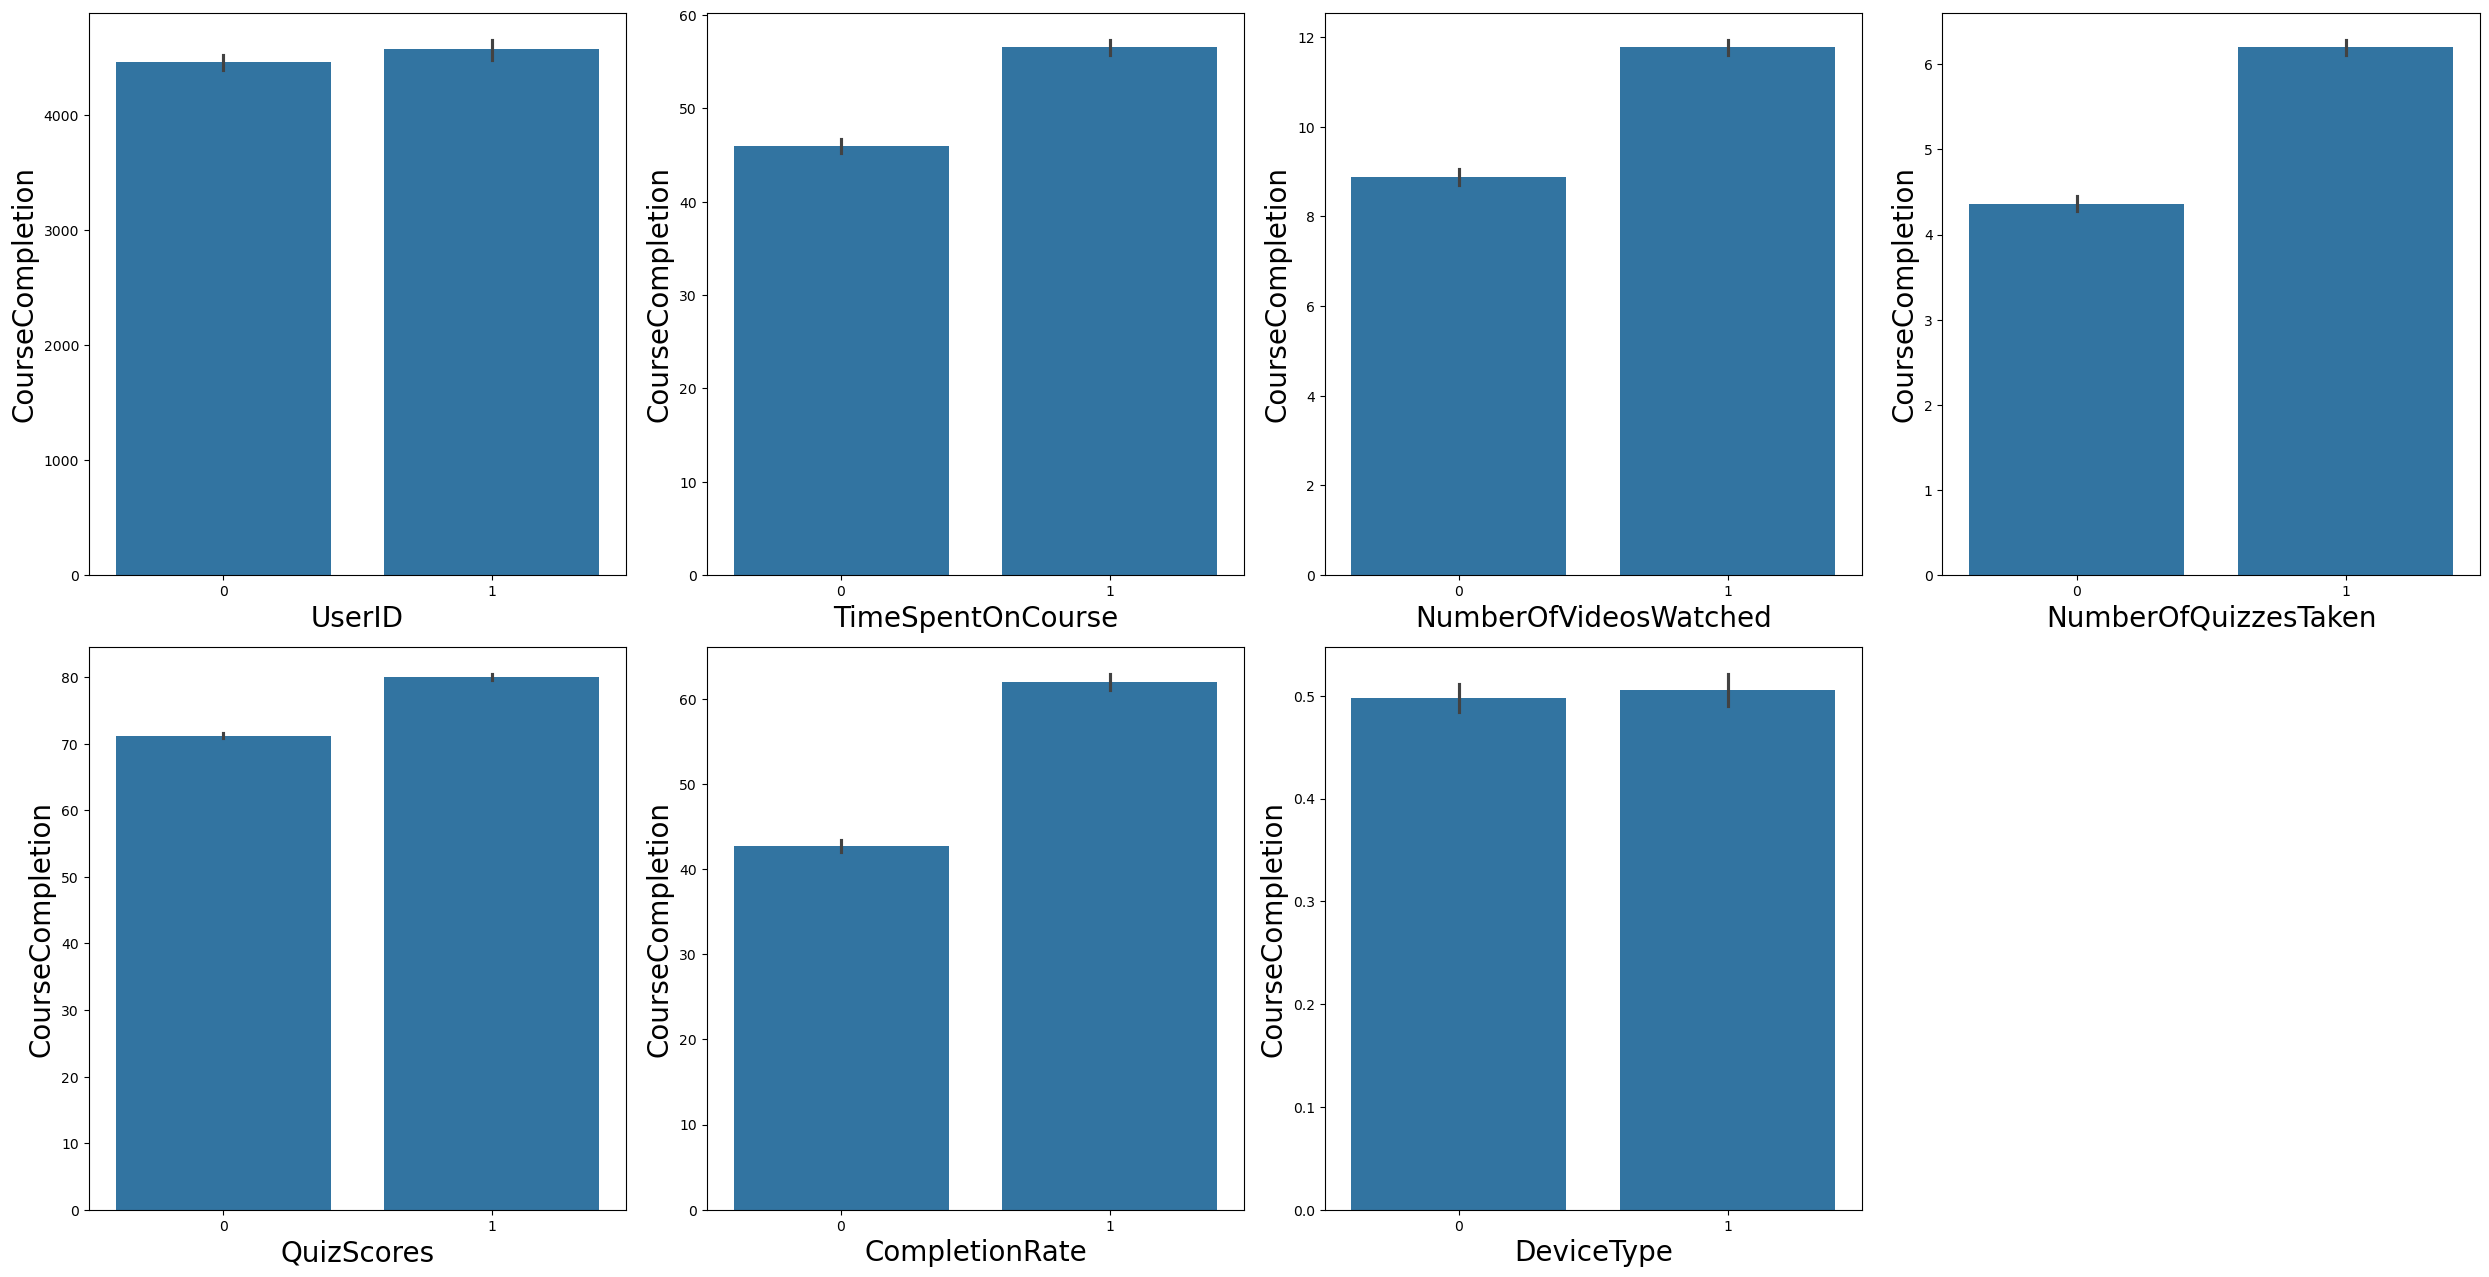

In [16]:
plt.figure(figsize=(25,25))
plotnumber=1
for columns in box:
    if plotnumber<=7:
        plt.subplot(4,4,plotnumber)
        sns.barplot(x=data.CourseCompletion,y=box[columns])
        plt.xlabel(columns,fontsize=20)
        plt.ylabel('CourseCompletion',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
data.columns

Index(['UserID', 'CourseCategory', 'TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion'],
      dtype='object')

In [18]:
data_box=data[['TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType', 'CourseCompletion']]

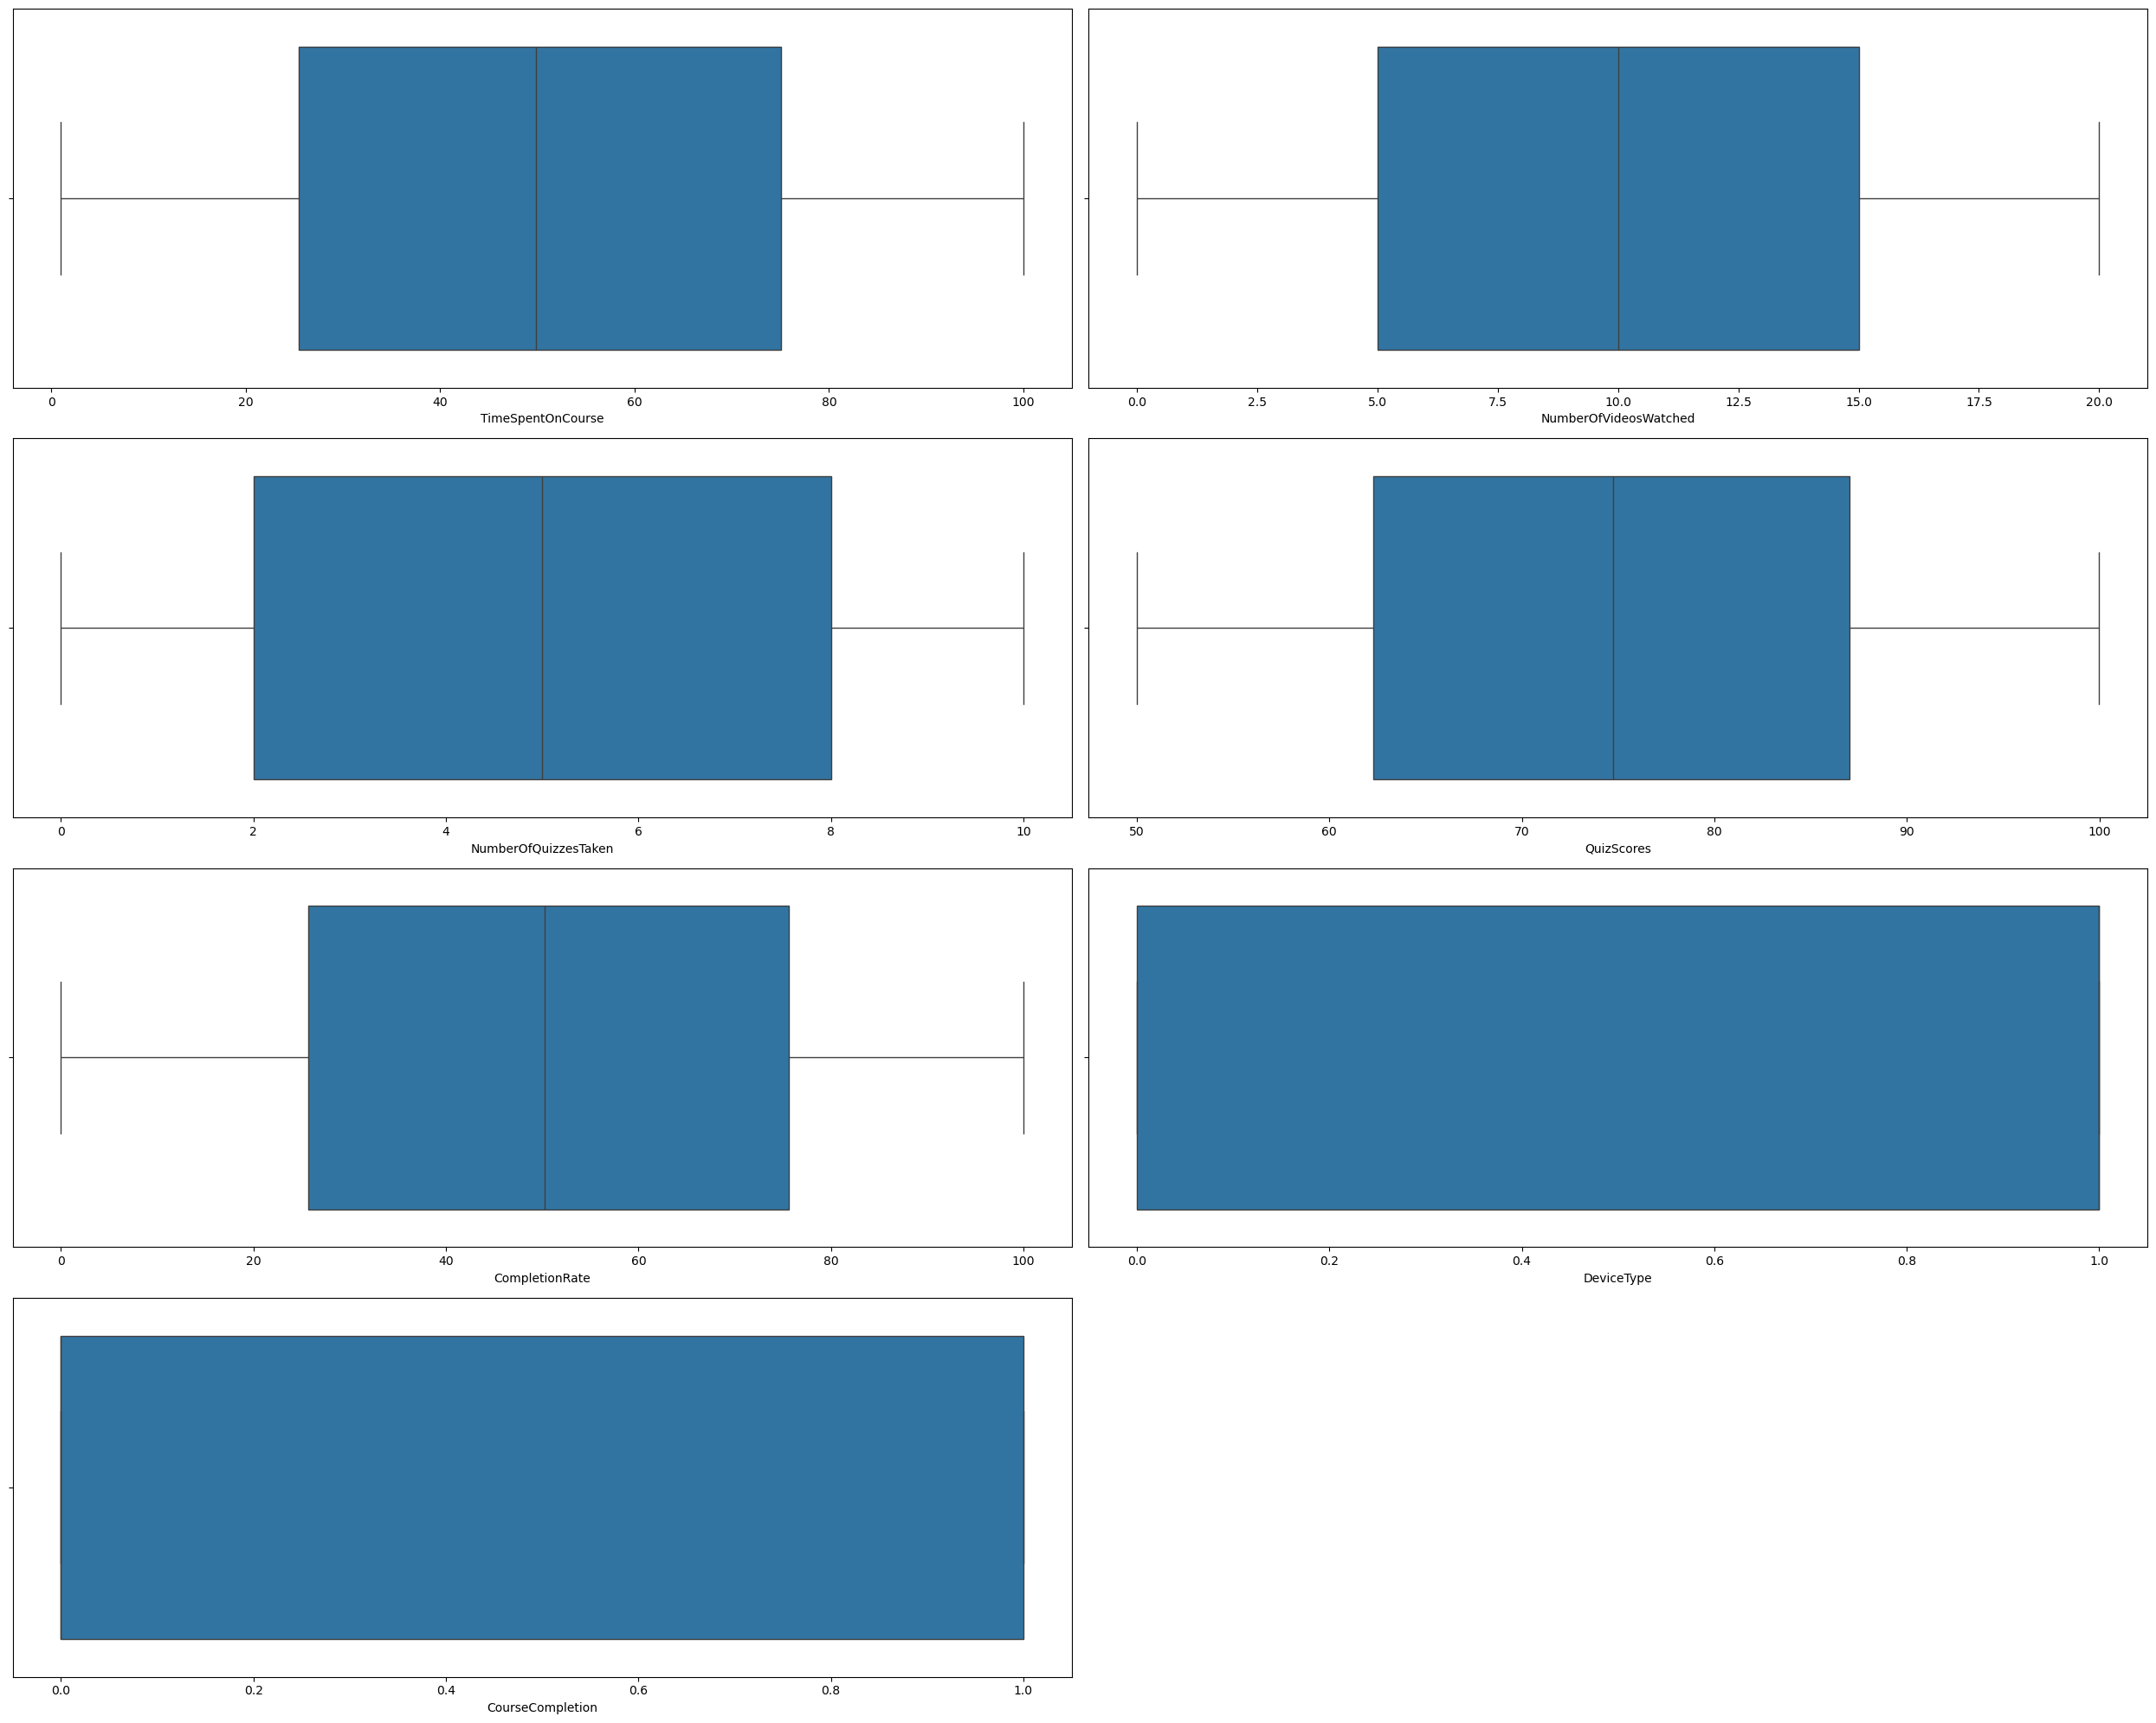

In [19]:
plt.figure(figsize=(25,20))
plotnumber=1
for columns in data_box:
    if plotnumber<=7:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(x=data_box[columns])
    plotnumber+=1
plt.tight_layout()

In [21]:
corr_rel=data[['TimeSpentOnCourse',
       'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'DeviceType']]

<Axes: >

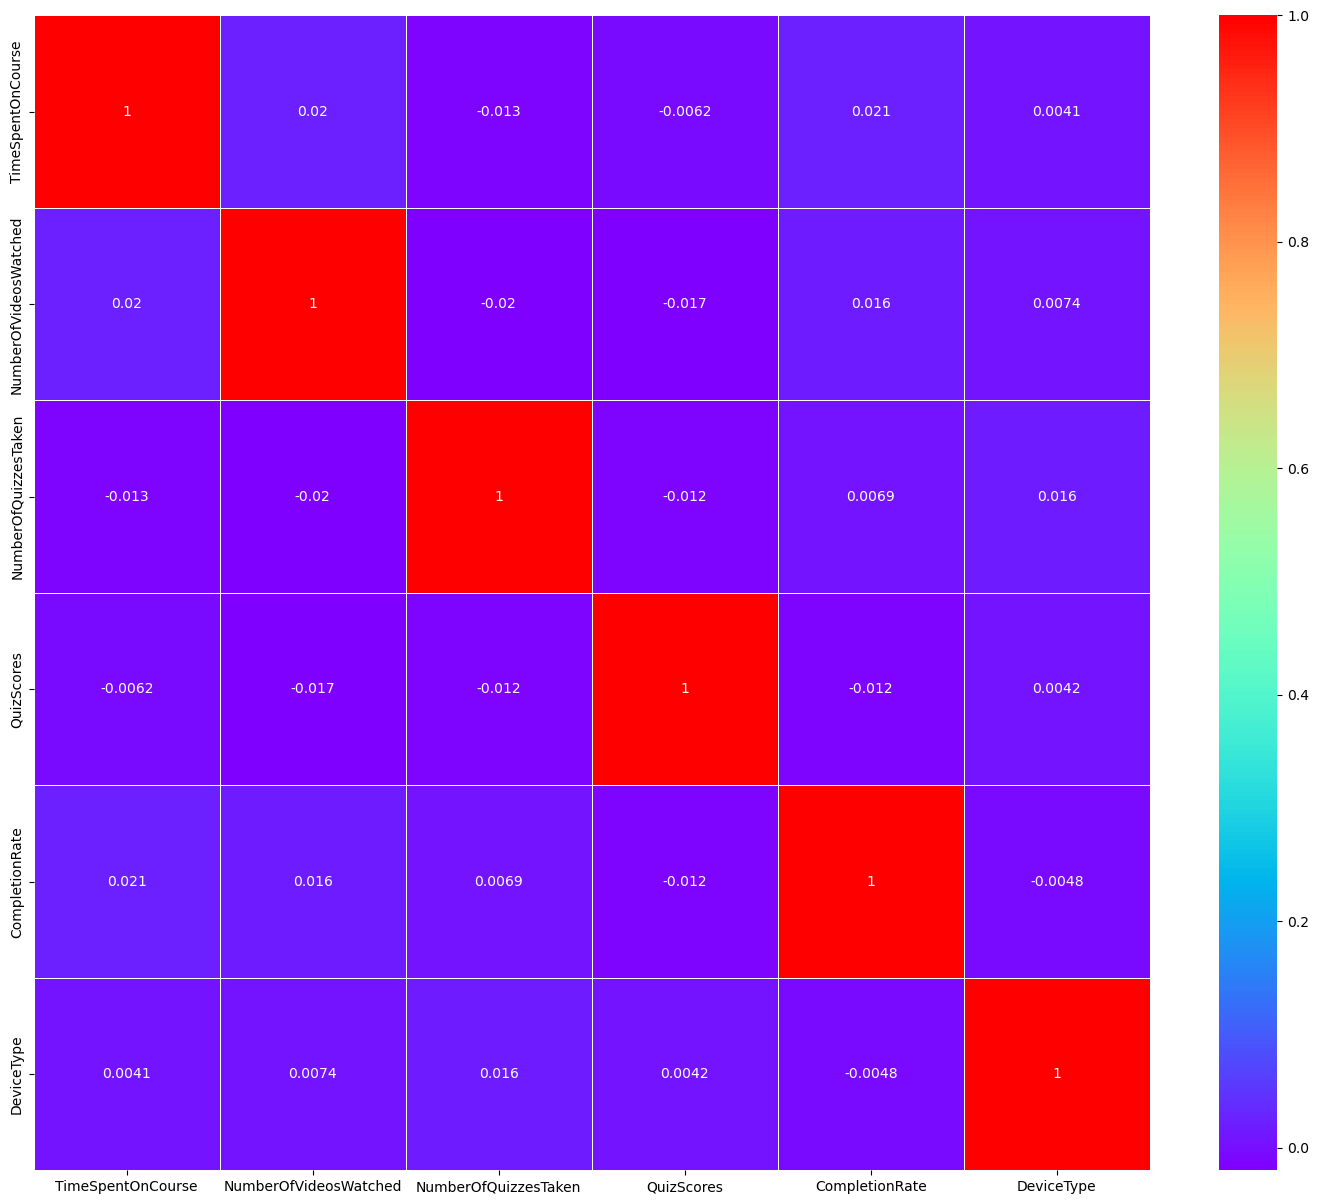

In [24]:
plt.figure(figsize=(18,15))
sns.heatmap(corr_rel.corr(),annot=True,cmap='rainbow',linewidth=0.5)

In [25]:
data.CourseCategory.value_counts()

CourseCategory
Business       1837
Health         1821
Science        1814
Programming    1810
Arts           1718
Name: count, dtype: int64

## Label Encoding

In [26]:
data.CourseCategory=data.CourseCategory.map({'Business':4,'Health':3,'Science':2,'Programming':1,'Arts':0})

In [27]:
data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,3,29.979719,17,3,50.365656,20.860773,1,0
1,4326,0,27.802640,1,5,62.615970,65.632415,1,0
2,5849,0,86.820485,14,2,78.458962,63.812007,1,1
3,4992,2,35.038427,17,10,59.198853,95.433162,0,1
4,3866,1,92.490647,16,0,98.428285,18.102478,0,0


## Create X and Y

In [28]:
x=data.iloc[:,:-1]
y=data.CourseCompletion

In [29]:
x.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType
0,5618,3,29.979719,17,3,50.365656,20.860773,1
1,4326,0,27.802640,1,5,62.615970,65.632415,1
2,5849,0,86.820485,14,2,78.458962,63.812007,1
3,4992,2,35.038427,17,10,59.198853,95.433162,0
4,3866,1,92.490647,16,0,98.428285,18.102478,0


In [30]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: CourseCompletion, dtype: int64

#### Model Creation

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

In [32]:
x_train.shape

(7200, 8)

In [33]:
y_test.shape

(1800,)

#### SMOTE values creation

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [35]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [36]:
print('Autual',Counter(y_train))
print('SMOTE',Counter(y_smote))

Autual Counter({0: 4348, 1: 2852})
SMOTE Counter({1: 4348, 0: 4348})


In [37]:
x_smote.shape

(8696, 8)

In [38]:
y_smote.shape

(8696,)

#### Prediction form Kneighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
error_rate=[]
for i in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    i_pred=KNN.predict(x_test)
    error_rate.append(np.mean(i_pred!=y_test))
error_rate

[0.2777777777777778,
 0.3022222222222222,
 0.31277777777777777,
 0.30444444444444446,
 0.3016666666666667,
 0.31222222222222223,
 0.30333333333333334,
 0.3061111111111111,
 0.29333333333333333,
 0.29388888888888887]

Text(0, 0.5, 'CourseComplection')

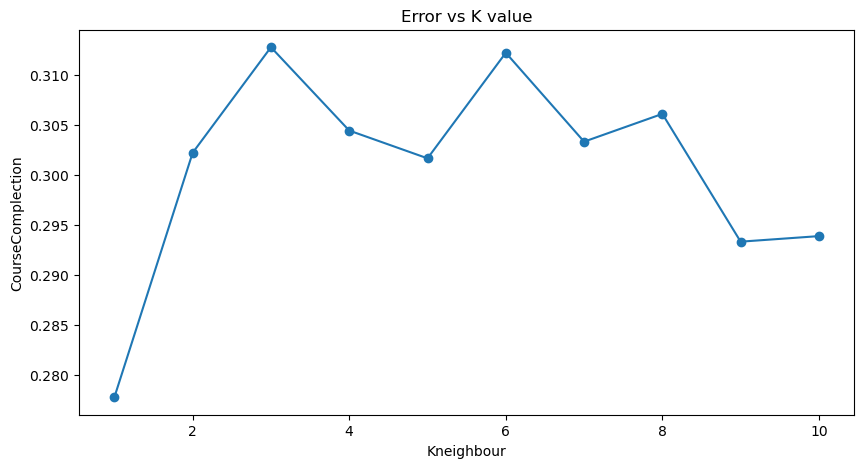

In [41]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),error_rate,marker='o')
plt.title('Error vs K value')
plt.xlabel('Kneighbour')
plt.ylabel('CourseComplection')

In [42]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred = KNN.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Training score KNN

In [44]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [45]:
y_train_score=KNN.predict(x_train)
y_train_score

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [46]:
print(f1_score(y_train_score,y_train,average='weighted'))

0.8221992138988256


In [47]:
print(accuracy_score(y_pred,y_test))

0.6983333333333334


In [48]:
print(accuracy_score(y_train_score,y_train))

0.8215277777777777


### By using Bagging base estimator is KNN

In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=21)
model_bagg.fit(x_smote,y_smote)
y_pred_bagg=model_bagg.predict(x_test)
y_pred_bagg

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
print(f1_score(y_test,y_pred_bagg,average='weighted'))

0.6864111124653772


In [52]:
print(accuracy_score(y_pred_bagg,y_test))

0.6833333333333333


### Prediction in Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_train_LR = LR.predict(x_smote)
y_pred_train_LR

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
print(accuracy_score(y_smote,y_pred_train_LR))

0.6115455381784729


In [57]:
y_pred_LR=LR.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
print(accuracy_score(y_test,y_pred_LR))

0.6444444444444445


### By using Bagging base estimator is KNN

In [59]:
from sklearn.ensemble import BaggingClassifier
model_bc = BaggingClassifier(base_estimator=LR,n_estimators=21)
model_bc.fit(x_smote,y_smote)
y_pred_bag = model_bc.predict(x_test)

In [60]:
y_pred_bag

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Training score

In [61]:
y_train_bag=model_bc.predict(x_train)

In [62]:
print(f1_score(y_train_bag,y_train,average='weighted'))

0.6476454970650452


#### Testing score

In [63]:
print(f1_score(y_test,y_pred_bag))

0.6252263126131562


In [64]:
print(accuracy_score(y_test,y_pred_bag))

0.655


### Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [74]:
y_pred_dt = model_dt.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [75]:
print(accuracy_score(y_test,y_pred_dt))

0.9616666666666667


### Bagging Classifier

In [76]:
model_bagg2 = BaggingClassifier(base_estimator=model_dt,n_estimators=21)
model_bagg2.fit(x_smote,y_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=21)

In [77]:
y_pred_clf3 = model_bagg2.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
print(f1_score(y_test,y_pred_clf3,average='weighted'))

0.9678360158922502


In [79]:
print(accuracy_score(y_test,y_pred_clf3))

0.9677777777777777


In [80]:
print(classification_report(y_test,y_pred_clf3))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1084
           1       0.95      0.97      0.96       716

    accuracy                           0.97      1800
   macro avg       0.96      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800

